### ASSIGNMENT: CLUSTERING ANALYSIS

In [4]:
# Import libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import scipy.cluster.hierarchy as sch

In [6]:
# read dataset
df = pd.read_csv('EastWestAirlines.csv')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [68]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


# Data Preprocessing:

In [8]:
# Check for missing values
print(df.isnull().sum())
df.fillna(df.mean(), inplace=True)

from scipy import stats
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
df = df[(z_scores < 3).all(axis=1)]
z_scores

sc = StandardScaler()
scaled_features = sc.fit_transform(df)
scaled_features

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


array([[-1.76632543, -0.52326043, -0.15886912, ..., -0.43177507,
         1.43143767, -0.71809304],
       [-1.76546049, -0.66708419, -0.15886912, ..., -0.43177507,
         1.41584783, -0.71809304],
       [-1.76459555, -0.30974703, -0.15886912, ..., -0.43177507,
         1.44800188, -0.71809304],
       ...,
       [ 1.70900444,  0.21135753, -0.15886912, ..., -0.43177507,
        -1.29581034,  1.3925772 ],
       [ 1.70986938, -0.0908356 , -0.15886912, ...,  0.11817002,
        -1.29629752, -0.71809304],
       [ 1.71073432, -0.9293577 , -0.15886912, ..., -0.43177507,
        -1.29775907, -0.71809304]])

In [9]:
import seaborn as sns

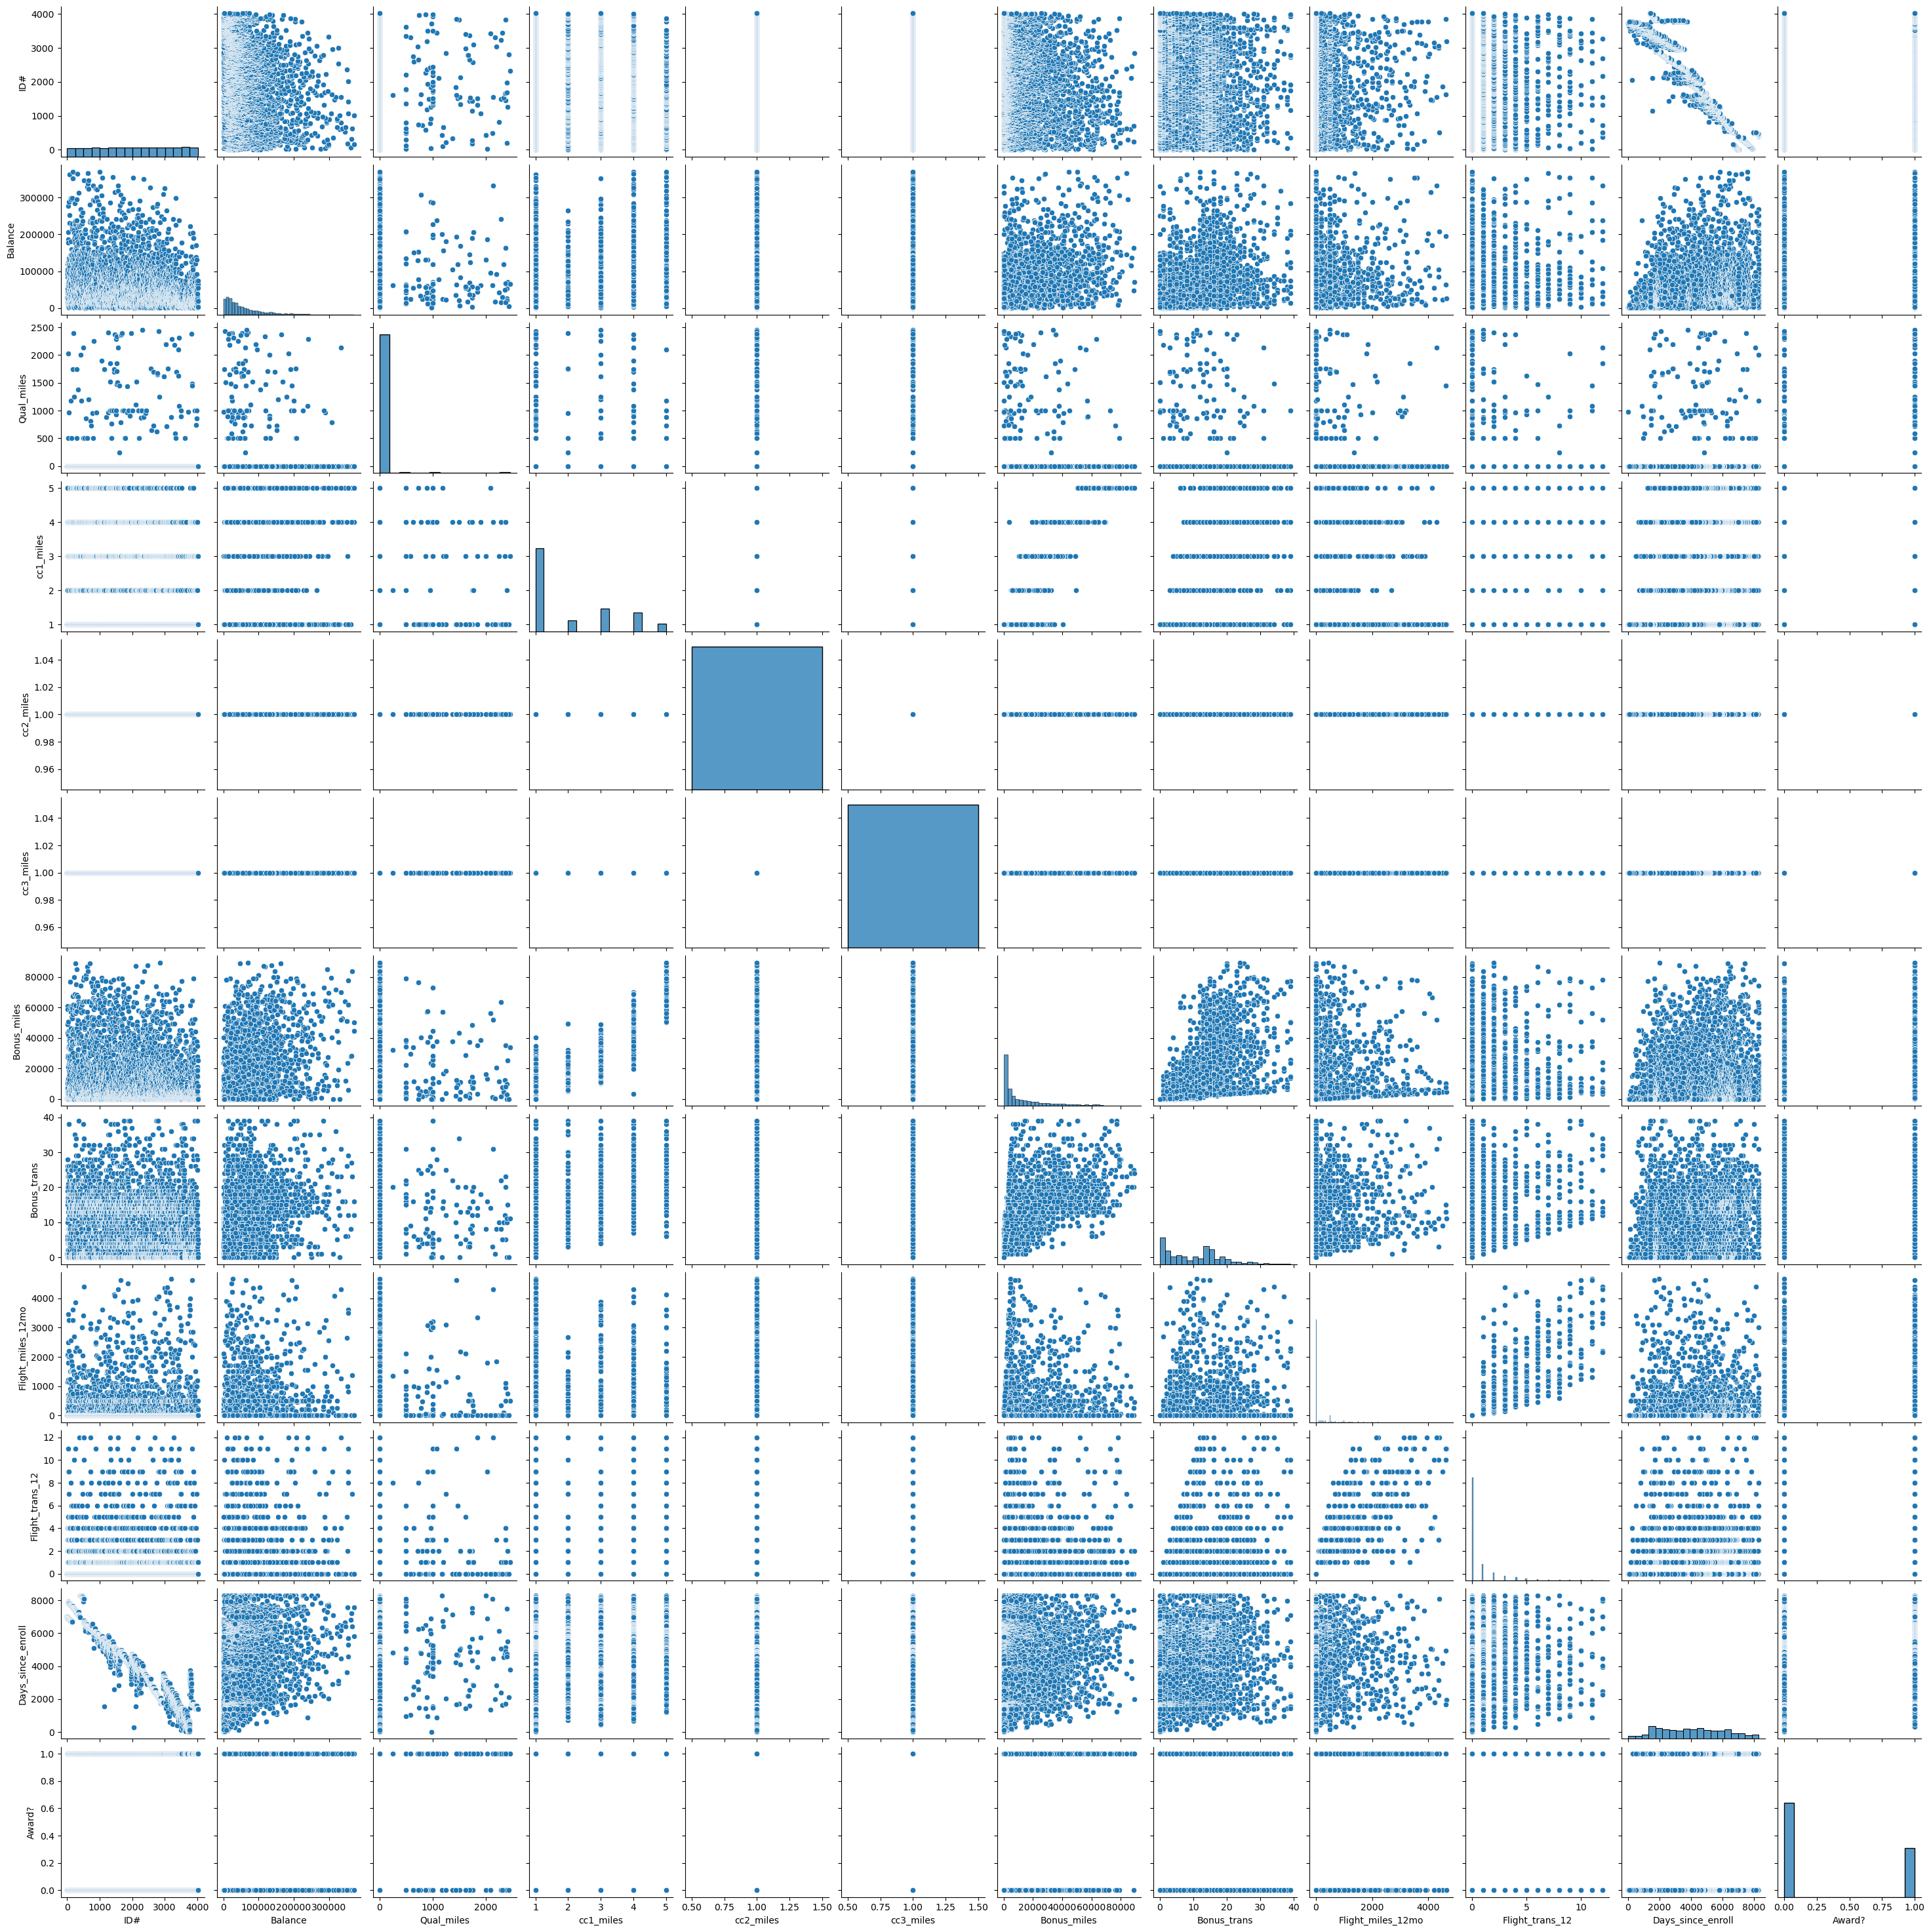

In [10]:
sns.pairplot(df)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

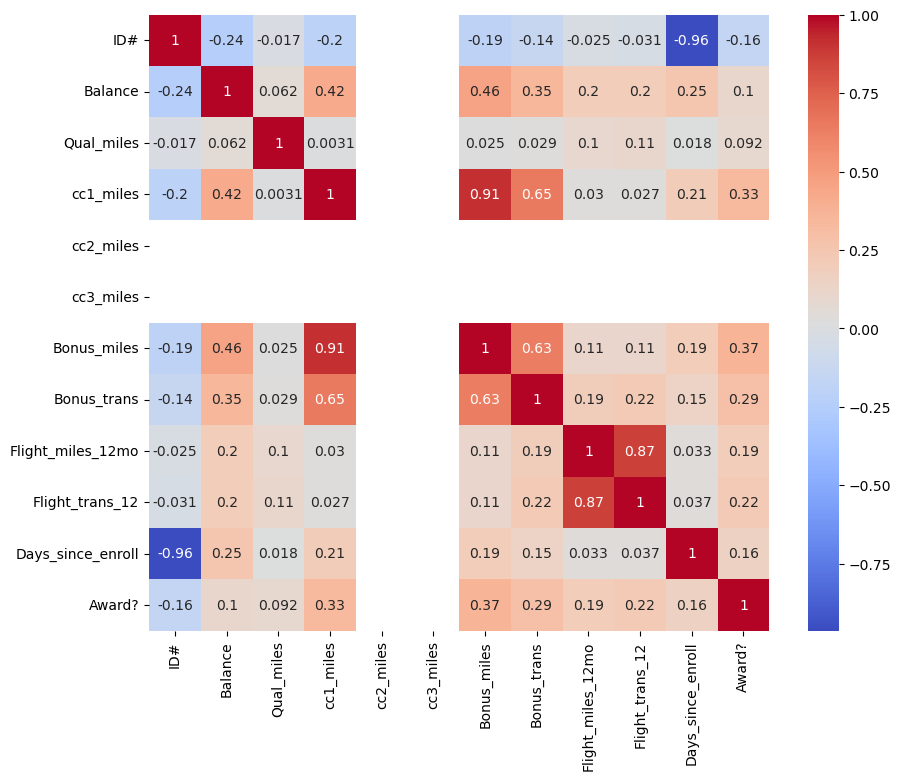

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show

array([[<Axes: title={'center': 'ID#'}>,
        <Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'Qual_miles'}>],
       [<Axes: title={'center': 'cc1_miles'}>,
        <Axes: title={'center': 'cc2_miles'}>,
        <Axes: title={'center': 'cc3_miles'}>],
       [<Axes: title={'center': 'Bonus_miles'}>,
        <Axes: title={'center': 'Bonus_trans'}>,
        <Axes: title={'center': 'Flight_miles_12mo'}>],
       [<Axes: title={'center': 'Flight_trans_12'}>,
        <Axes: title={'center': 'Days_since_enroll'}>,
        <Axes: title={'center': 'Award?'}>]], dtype=object)

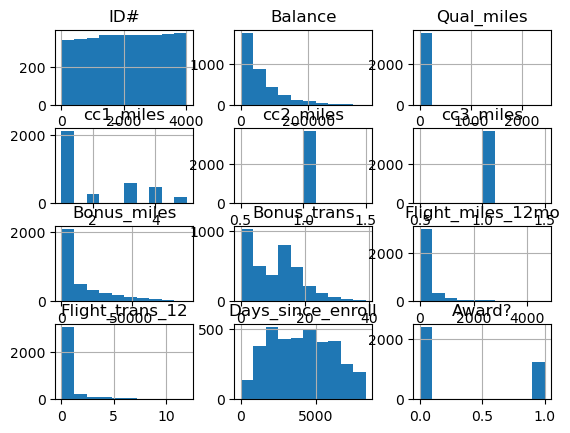

In [12]:
df.hist()

<Axes: >

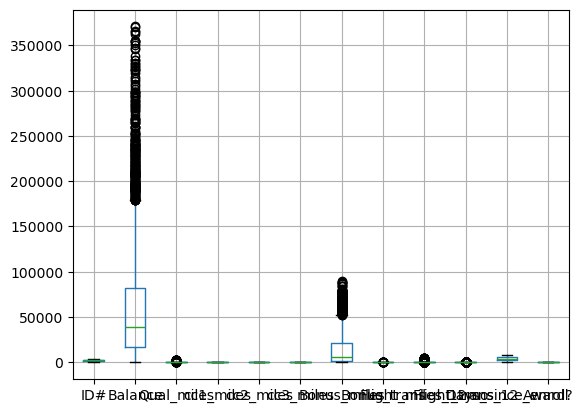

In [13]:
df.boxplot()

# K Means Clustering

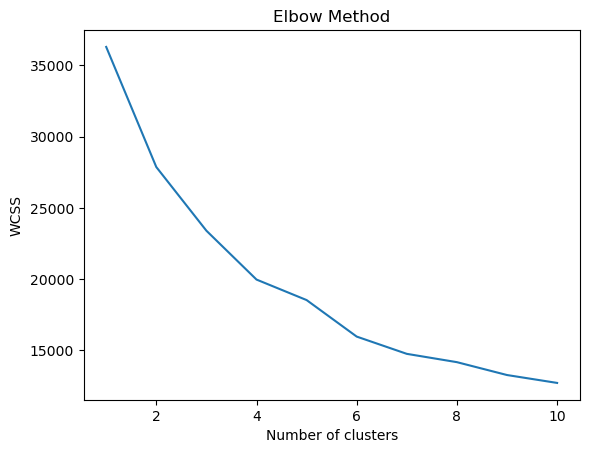

In [15]:
wcss =[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)

# Evaluate K-Means
silhouette_kmeans = silhouette_score(scaled_features, kmeans_labels)
print(f'Silhouette Score for K-Means: {silhouette_kmeans}')

Silhouette Score for K-Means: 0.29192710837860614


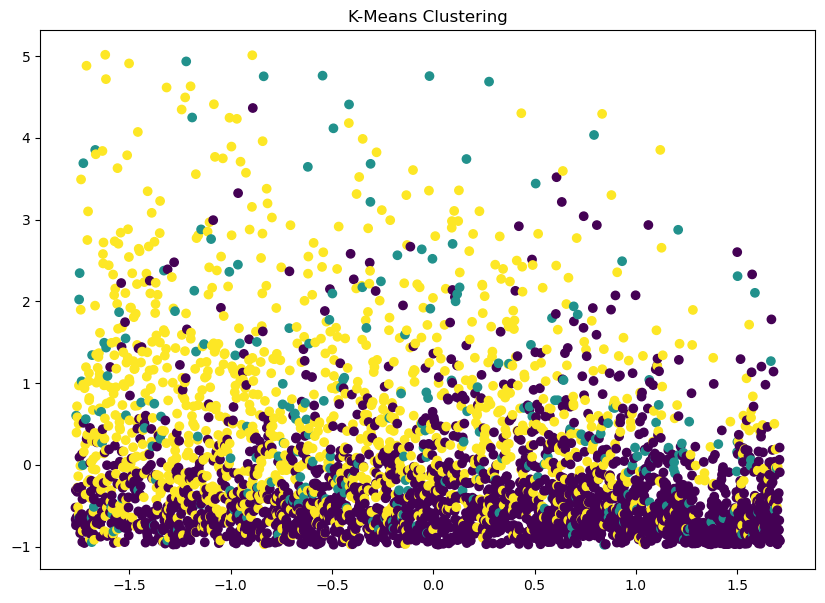

In [17]:
plt.figure(figsize=(10,7))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.show()

# Hierarchical Clustering

In [19]:
#Import Libraries

In [20]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [21]:
# read dataset

In [22]:
df = pd.read_csv('EastWestAirlines.csv')

In [23]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [24]:
# Impute missing values

In [25]:
imputer = SimpleImputer(strategy='mean') #or 'median', 'most_frequent'
df_imputed = imputer.fit_transform(df)

In [26]:
# standardlization

In [27]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

In [28]:
#using Ward's method and Euclidean distance

In [29]:
Z = linkage(df_scaled, method='ward', metric='euclidean')

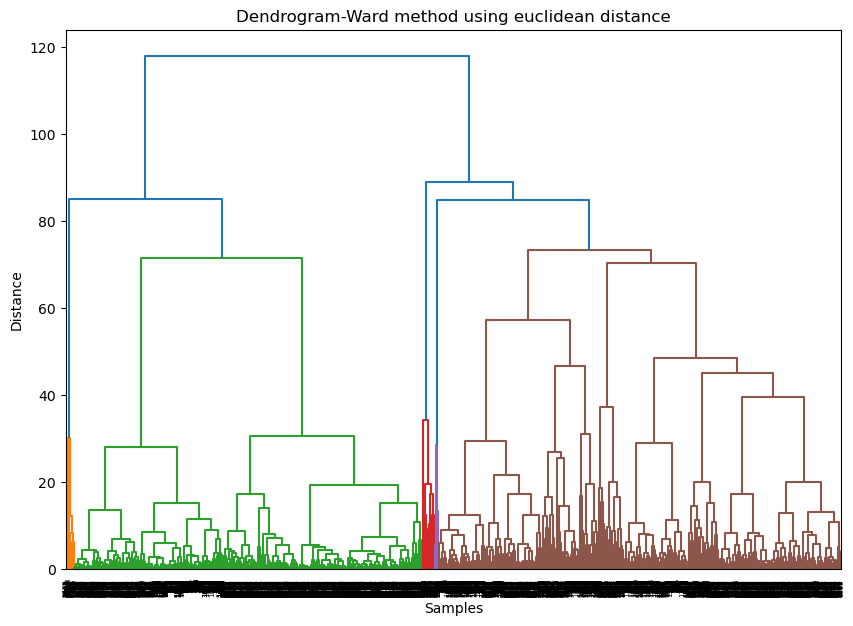

In [30]:
#Plot dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram-Ward method using euclidean distance")
dendrogram(Z)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [31]:
# using single-linkage with euclidean distance

In [32]:
Z_single = linkage(df_scaled, method='single', metric='euclidean')

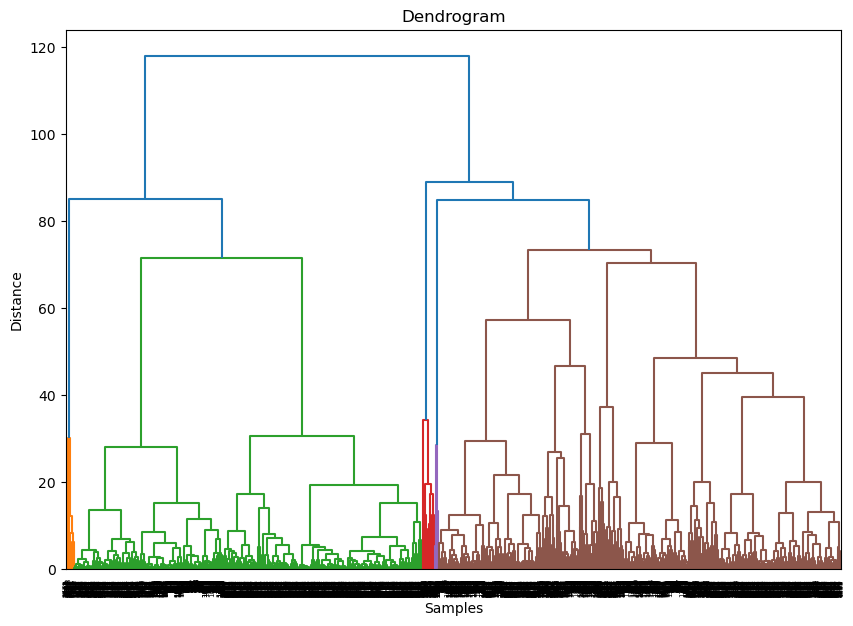

In [33]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dendrogram(Z)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [34]:
# complete linkage with euclidean distance

In [35]:
Z_complete = linkage(df_scaled, method='complete', metric='euclidean')

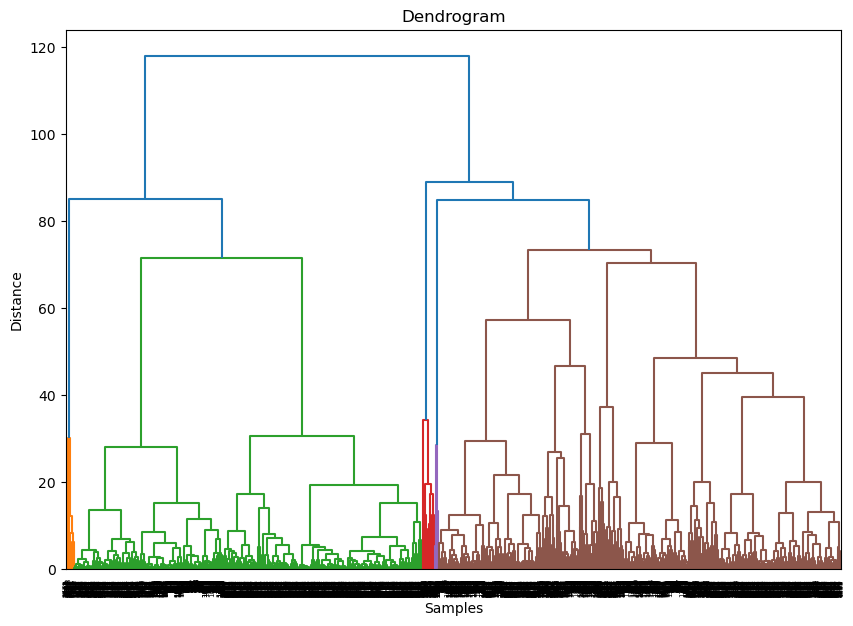

In [36]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dendrogram(Z)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [37]:
#single linkage with cityblock manhattan distance

In [38]:
Z_single_manhattan = linkage(df_scaled, method='single', metric='cityblock')

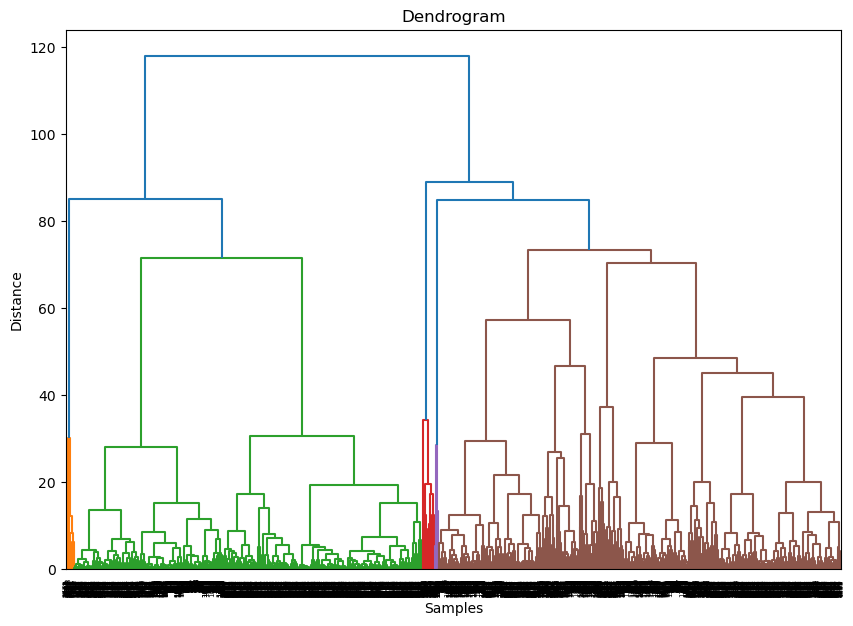

In [39]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dendrogram(Z)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [40]:
#complete linkage with manhattan distance

In [41]:
Z_complete_manhattan = linkage(df_scaled, method='complete', metric='cityblock')

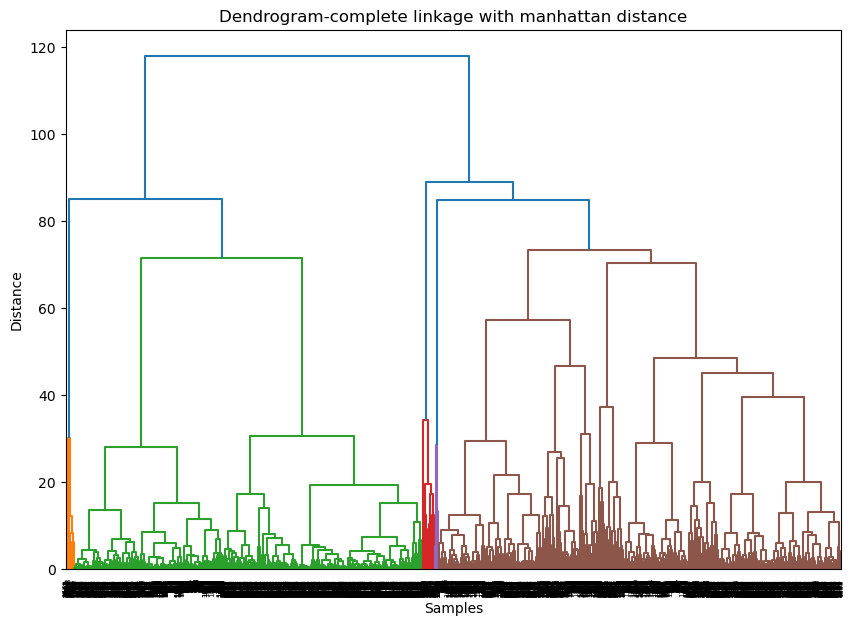

In [42]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram-complete linkage with manhattan distance")
dendrogram(Z)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [43]:
#average linkage with manhattan daistance

In [44]:
Z_average_manhattan = linkage(df_scaled, method= 'average', metric='cityblock')

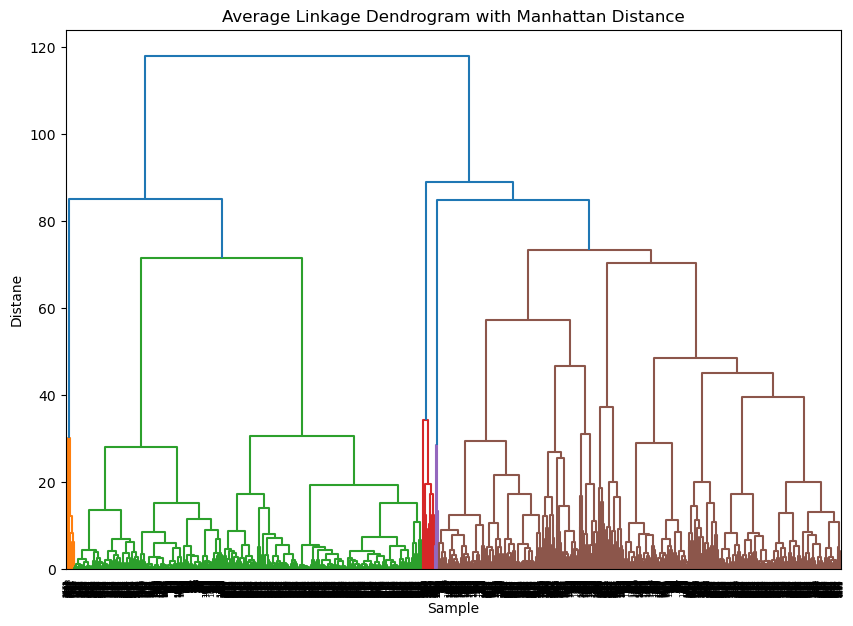

In [45]:
plt.figure(figsize=(10, 7))
plt.title("Average Linkage Dendrogram with Manhattan Distance")
dendrogram(Z)
plt.xlabel('Sample')
plt.ylabel('Distane')
plt.show()

# DBSCAN clustering

In [56]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_features)

In [64]:
silhouette_dbscan = silhouette_score(scaled_features, dbscan_labels)
print(f'Silhouette Score for DBSCAN: {silhouette_dbscan}')

Silhouette Score for DBSCAN: -0.3994552312980999


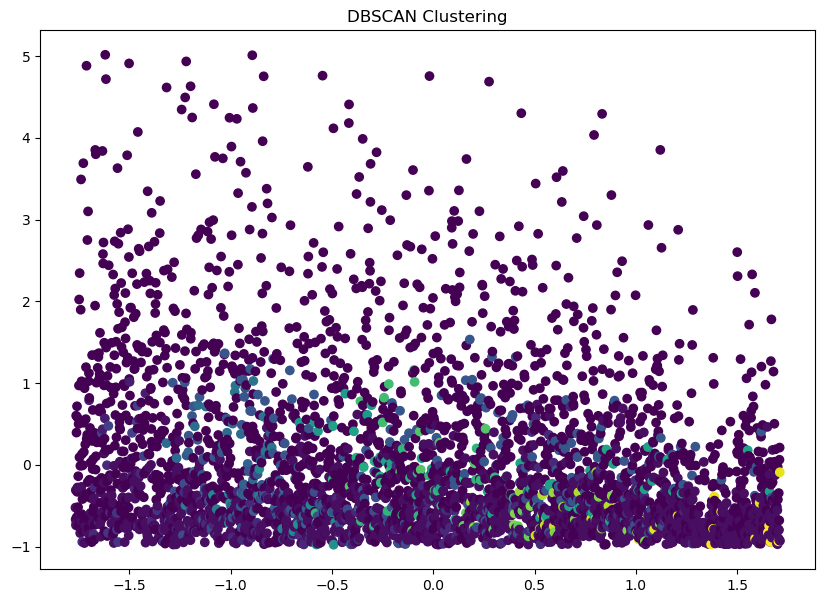

In [66]:
plt.figure(figsize=(10, 7))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()